# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

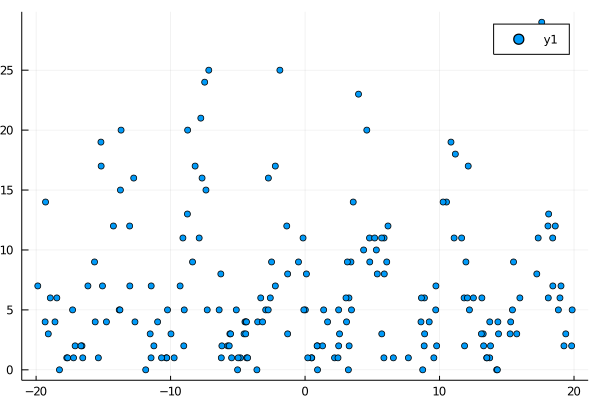

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -595.0652827028052
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.139545 seconds (7.46 M allocations: 475.454 MiB, 98.00% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.4402305027589422, 0.26542712573678534, 0.436244982318686, 0.3420939958339401, 0.24824559003067379, 0.19495803040550194, 0.3821976114745085, 0.3817568124510159, 0.48465688942199464, 0.25832594277511517  …  0.24224577583679519, 0.43883108308268015, 0.38337529527031244, 0.4194562703528335, 0.390906602246497, 0.22189199864983664, 0.17399142001486437, 0.28721032883727243, 0.24679320543886518, 0.43473773082716854], θ = [2.952470205228334, 4.473765476167305, 3.9377478885935653, 3.466261525950314, 10.943855585931153, 4.984223032709882, 3.95200923209485, 4.446133062466802, 14.713121304665657, 4.972379183446617  …  6.468398798813956, 2.9527662060628836, 5.92757596944056, 4.927957459342409, 8.887118625374505, 2.98775128952407, 5.486166744399538, 2.4829552188449577, 2.9848654515799375, 2.9536270145909214]), opt_state = (NamedTuple(),), hyperopt_state = (Name

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and n_latent latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -718.2626184490765
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.182645 seconds (4.38 M allocations: 309.918 MiB, 12.17% gc time, 97.07% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.331962021053082) infered by Analytic Variational Inference , (local_vars = (c = [0.6596605306481274, 0.1693115428521636, 0.6700910504964327, 0.5697213360666119, 0.1433191446974201, 0.1595129549054194, 0.5963926085777171, 0.6064111130538735, 0.4226095509391577, 0.1406449487248033  …  0.13321130993060787, 0.6512133077714303, 0.311841176328443, 0.3382615462304685, 0.29213749547964457, 0.40263646716275653, 0.23471107035551775, 0.4945357942271844, 0.13418411069457628, 0.6525286828224273], θ = [4.98617615639147, 5.505535319954084, 5.976914822079269, 5.377538710143959, 12.002678899738898, 6.181516850822492, 5.881172600235631, 6.405545609375349, 15.153641573388782, 5.964090146885697  …  7.518106242563257, 4.970034556675207, 6.854631448028955, 5.483837035985477, 9.548190552545321, 4.670089469782776, 6.8556130022017685, 4.305721585268376, 4.008496712270945, 4.994891444731394], γ = [9.331380603366686, 7.037362059419951, 9.39781200745

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

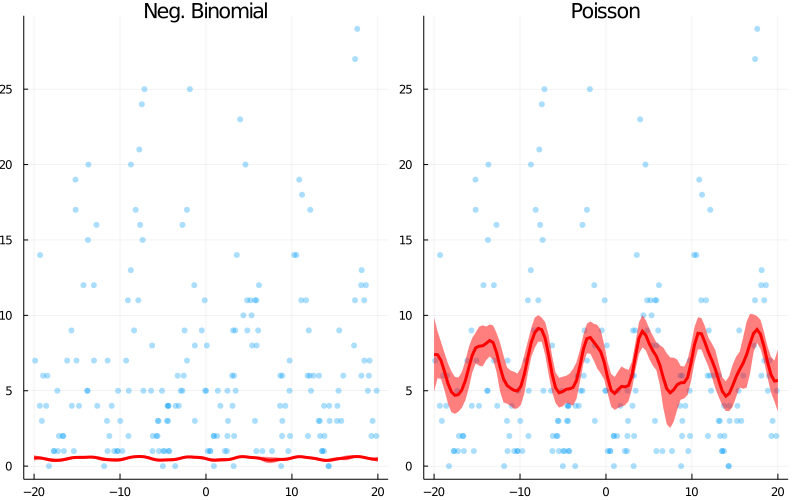

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*